In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!mkdir /content/drive/MyDrive/Thesis/DataSet/BraTS-2021

In [ ]:
!unzip "/content/drive/MyDrive/Thesis/DataSet/archive-2021.zip" -d "/content/drive/MyDrive/Thesis/DataSet/BraTS-2021/"

Archive:  /content/drive/MyDrive/Thesis/DataSet/archive-2021.zip
  inflating: /content/drive/MyDrive/Thesis/DataSet/BraTS-2021/BraTS2021_00495.tar  
  inflating: /content/drive/MyDrive/Thesis/DataSet/BraTS-2021/BraTS2021_00621.tar  
  inflating: /content/drive/MyDrive/Thesis/DataSet/BraTS-2021/BraTS2021_Training_Data.tar  


In [ ]:
!mkdir /content/drive/MyDrive/Thesis/DataSet/BraTS-2021/imagesTr/

In [ ]:
import tarfile


dataset_path = '/content/drive/MyDrive/Thesis/DataSet/BraTS-2021/'

tar = tarfile.open(f"{dataset_path}BraTS2021_Training_Data.tar")
tar.extractall("/content/drive/MyDrive/Thesis/DataSet/BraTS-2021/imagesTr/")
tar.close()

tar = tarfile.open(f"{dataset_path}BraTS2021_00495.tar")
tar.extractall("/content/drive/MyDrive/Thesis/DataSet/BraTS-2021/imagesTr/")
tar.close()

tar = tarfile.open(f"{dataset_path}BraTS2021_00621.tar")
tar.extractall("/content/drive/MyDrive/Thesis/DataSet/BraTS-2021/imagesTr/", )
tar.close()

In [ ]:
img_type = ["flair", "t1", "t1ce", "t2", "seg"]
extracted_dataset_path = '/content/drive/MyDrive/Thesis/DataSet/BraTS-2021/imagesTr/'

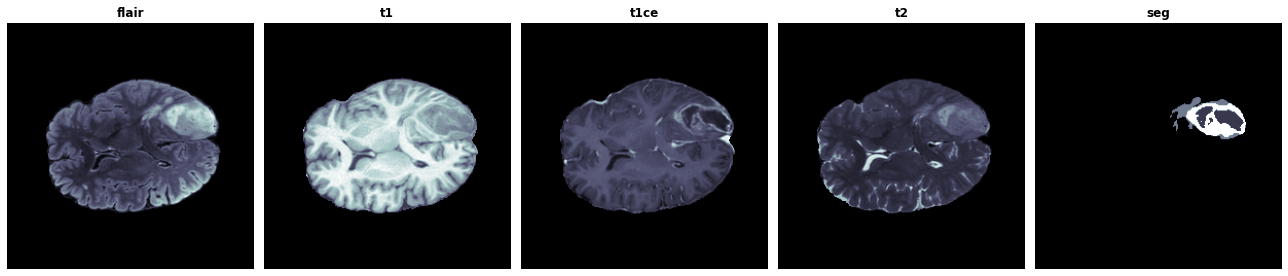

In [ ]:
import matplotlib.pyplot as plt
import nibabel as nib

img_id = "00495"
plt.figure(figsize=(18, 5))

for i, nii in enumerate([f'{extracted_dataset_path}BraTS2021_{img_id}/BraTS2021_{img_id}_{s_type}.nii.gz' for s_type in img_type]):
    plt.subplot(1,5,i+1)
    image=nib.load(nii).get_fdata()
    plt.title(nii.rsplit("_", 1)[1].split(".", 1)[0], fontweight="bold")
    plt.axis(False)
    plt.imshow(image[:, :, 80], cmap="bone")
plt.tight_layout()    
plt.show()

In [ ]:
!ls /content/drive/MyDrive/Thesis/DataSet/BraTS-2021/imagesTr/BraTS2021_00000/

BraTS2021_00000_flair.nii.gz  BraTS2021_00000_t1.nii.gz
BraTS2021_00000_seg.nii.gz    BraTS2021_00000_t2.nii.gz
BraTS2021_00000_t1ce.nii.gz


In [ ]:
import os

fp_list = [os.path.join(r,f[i]) for r,d,f in os.walk("/content/data/") if d==[] 
                                for i in range(len(f))]

fp_list = sorted(fp_list)
fp_list

In [ ]:
! pip install antspyx

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 313.7 MB 19 bytes/s 
     |████████████████████████████████| 64 kB 3.7 MB/s 
  Created wheel for retrying: filename=retrying-1.3.3-py3-none-any.whl size=11447 sha256=e32f46ae88ee19e6a7144f5f9150cd1d385488cfb530af7580708e0a7680af8a
  Stored in directory: /root/.cache/pip/wheels/f9/8d/8d/f6af3f7f9eea3553bc2fe6d53e4b287dad18b06a861ac56ddf
Successfully built retrying


In [ ]:
import ants

fp_list_sep_gen = (([ants.image_read(fp) for fp in fp_list_sep[i][0]], ants.image_read(fp_list_sep[i][1])) for i in range(len(fp_list_sep)))
fp_list_sep_gen

<generator object <genexpr> at 0x7f2bf2d216d0>

ANTsPy is an optimized and validated medical imaging library for 
Python.

In [ ]:
imgs, mask = next(fp_list_sep_gen)

In [ ]:
imgs

[ANTsImage (RAI)
 	 Pixel Type : float (float32)
 	 Components : 1
 	 Dimensions : (240, 240, 155)
 	 Spacing    : (1.0, 1.0, 1.0)
 	 Origin     : (-0.0, -239.0, 0.0)
 	 Direction  : [1. 0. 0. 0. 1. 0. 0. 0. 1.], ANTsImage (RAI)
 	 Pixel Type : float (float32)
 	 Components : 1
 	 Dimensions : (240, 240, 155)
 	 Spacing    : (1.0, 1.0, 1.0)
 	 Origin     : (-0.0, -239.0, 0.0)
 	 Direction  : [1. 0. 0. 0. 1. 0. 0. 0. 1.], ANTsImage (RAI)
 	 Pixel Type : float (float32)
 	 Components : 1
 	 Dimensions : (240, 240, 155)
 	 Spacing    : (1.0, 1.0, 1.0)
 	 Origin     : (-0.0, -239.0, 0.0)
 	 Direction  : [1. 0. 0. 0. 1. 0. 0. 0. 1.], ANTsImage (RAI)
 	 Pixel Type : float (float32)
 	 Components : 1
 	 Dimensions : (240, 240, 155)
 	 Spacing    : (1.0, 1.0, 1.0)
 	 Origin     : (-0.0, -239.0, 0.0)
 	 Direction  : [1. 0. 0. 0. 1. 0. 0. 0. 1.]]

In [ ]:
mask

ANTsImage (RAI)
	 Pixel Type : float (float32)
	 Components : 1
	 Dimensions : (240, 240, 155)
	 Spacing    : (1.0, 1.0, 1.0)
	 Origin     : (0.0, -239.0, 0.0)
	 Direction  : [1. 0. 0. 0. 1. 0. 0. 0. 1.]

In [ ]:
!pip install colormaps

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement colormaps (from versions: none)
ERROR: No matching distribution found for colormaps


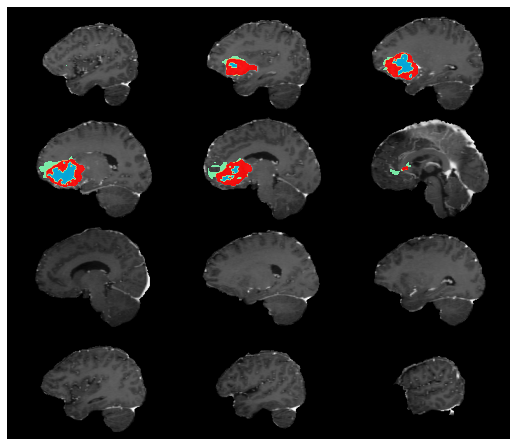

In [ ]:
ants.plot(imgs[2], overlay=mask, overlay_cmap='rainbow') # 0: flair, 1: t1, 2: t1_ce, 3:t2

In [2]:
import numpy as np
import math
import random
import os
import shutil
import gzip
import gc
import cv2 as cv
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
import tarfile
import PIL
import scipy.misc
import skimage
import nibabel as nib
import matplotlib.pyplot as plt

from PIL import Image
from tqdm import tqdm
from tensorflow import keras
from keras.models import Model, load_model
from keras.layers import Input ,BatchNormalization , Activation 
from keras.layers.convolutional import Conv2D, UpSampling2D
from keras.layers.pooling import MaxPooling2D
from keras.layers import concatenate
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras import optimizers 
from keras import backend as K
from sklearn.model_selection import train_test_split
from skimage.morphology import ball, disk, dilation, binary_erosion, remove_small_objects, erosion, closing, reconstruction, binary_closing
from skimage.measure import label,regionprops, perimeter
from skimage.morphology import binary_dilation, binary_opening
from skimage.filters import roberts, sobel
from skimage import measure, feature
from skimage.segmentation import clear_border
from skimage import data
from skimage.io import imread
from scipy import ndimage as ndi
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
from glob import glob

Check the GPU

In [3]:
DEVICE = "GPU"
strategy = tf.distribute.get_strategy()

if DEVICE == "GPU":
    print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))
    

AUTO = tf.data.experimental.AUTOTUNE
REPLICAS = strategy.num_replicas_in_sync
print(f'REPLICAS: {REPLICAS}')

Num GPUs Available:  1
REPLICAS: 1


UNET Model

UNet is dedicated to solving this problem. The reason it is able to localise and distinguish borders is by doing classification on every pixel, so the input and output share the same size.

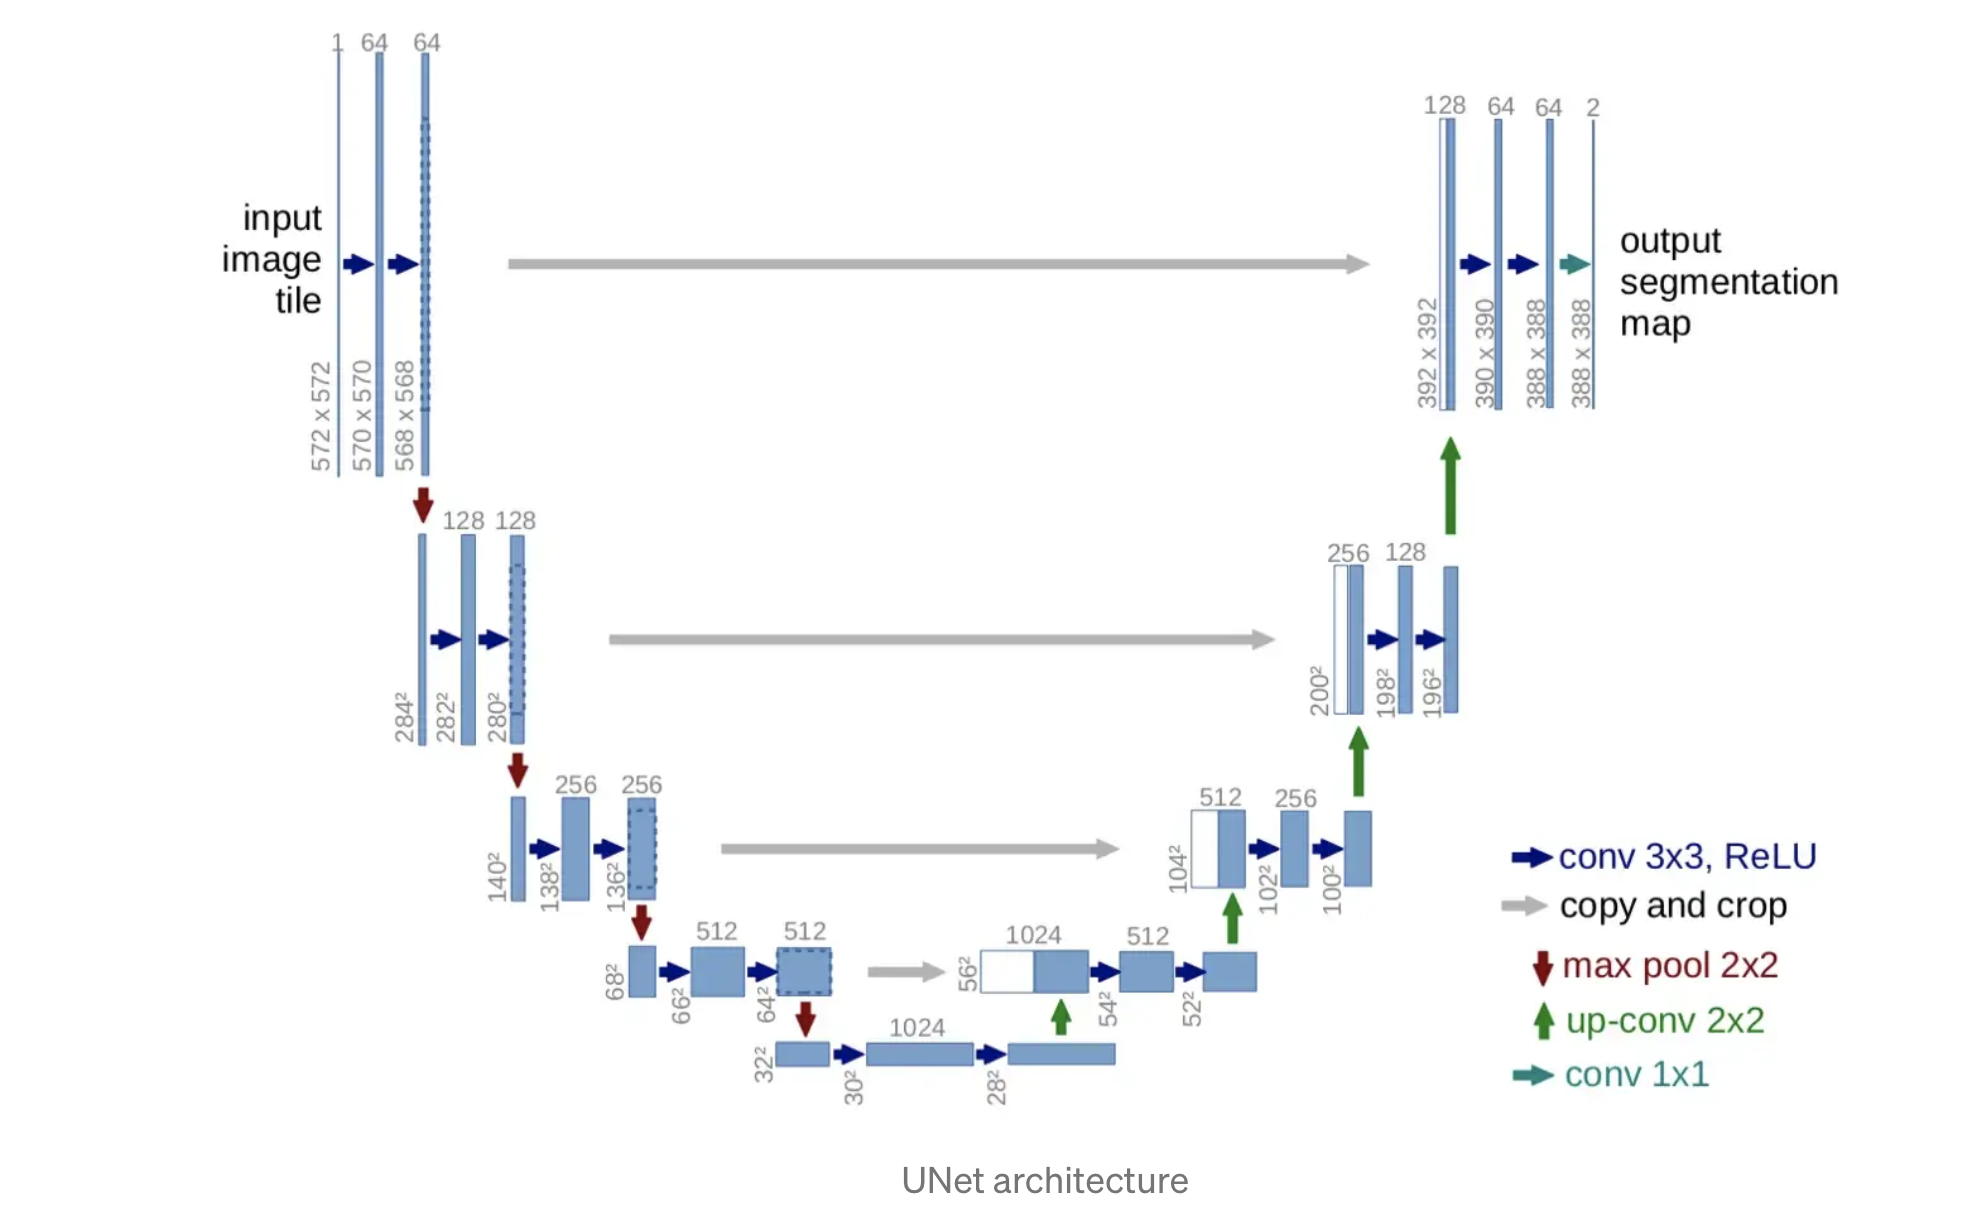

In [4]:
def Convolution(input_tensor,filters):
    x = Conv2D(filters=filters, kernel_size=(3, 3), padding = 'same', strides=(1, 1))(input_tensor)
    x = BatchNormalization()(x)
    x = Activation('relu')(x) 
    return x


def model(input_shape):
    # Input
    inputs = Input((input_shape))

    # Left Size
    conv_1 = Convolution(inputs, 32)
    maxp_1 = MaxPooling2D(pool_size = (2, 2), strides = (2, 2), padding = 'same') (conv_1)
    
    conv_2 = Convolution(maxp_1, 64)
    maxp_2 = MaxPooling2D(pool_size = (2, 2), strides = (2, 2), padding = 'same') (conv_2)
    
    conv_3 = Convolution(maxp_2, 128)
    maxp_3 = MaxPooling2D(pool_size = (2, 2), strides = (2, 2), padding = 'same') (conv_3)
    
    conv_4 = Convolution(maxp_3, 256)
    maxp_4 = MaxPooling2D(pool_size = (2, 2), strides = (2, 2), padding = 'same') (conv_4)

    # Niddle of the Layer
    conv_5 = Convolution(maxp_4, 512)
    upsample_6 = UpSampling2D((2, 2)) (conv_5)

    upsample_6 = concatenate([upsample_6, conv_4])
    
    conv_6 = Convolution(upsample_6, 256)
    upsample_7 = UpSampling2D((2, 2)) (conv_6)
    
    upsample_7 = concatenate([upsample_7, conv_3])
    
    conv_7 = Convolution(upsample_7, 128)
    upsample_8 = UpSampling2D((2, 2)) (conv_7)

    upsample_8 = concatenate([upsample_8, conv_2])
    
    conv_8 = Convolution(upsample_8, 64)
    upsample_9 = UpSampling2D((2, 2)) (conv_8)
    
    upsample_9 = concatenate([upsample_9, conv_1])

    # Output   
    conv_9 = Convolution(upsample_9, 32)
    outputs = Conv2D(1, (1, 1), activation='sigmoid') (conv_9)
    
    model = Model(inputs=[inputs], outputs=[outputs]) 
    
    return model

DICE COEFFICIENT

The Dice coefficient can be used to compare the pixel-wise agreement between a predicted segmentation and its corresponding ground truth.

It is 2 times The area of Overlap divided by the total number of pixels in both the images Dice coeff image


Formula:
DC = 2∗|𝑋∩𝑌|/(|𝑋|+|𝑌|) 


where X is the predicted set of pixels and Y is the ground truth.

The Dice coefficient is defined to be 1 when both X and Y are empty. The leaderboard score is the mean of the Dice coefficients for each image in the test set.

In [5]:
# Computing Dice_Coefficient
def dice_coef(y_true, y_pred, smooth=1.0):
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_f * y_pred_f)
    return (2. * intersection + smooth) / (K.sum(y_true_f) + K.sum(y_pred_f) + smooth)

# Computing Precision 
def precision(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
        precision = true_positives / (predicted_positives + K.epsilon())
        return precision

# Computing Sensitivity/Recall      
def sensitivity(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    return true_positives / (possible_positives + K.epsilon())

# Computing Specificity
def specificity(y_true, y_pred):
    true_negatives = K.sum(K.round(K.clip((1-y_true) * (1-y_pred), 0, 1)))
    possible_negatives = K.sum(K.round(K.clip(1-y_true, 0, 1)))
    return true_negatives / (possible_negatives + K.epsilon())

In [6]:
# Accuracy vs Epoch
def Accuracy_Graph(history):
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.subplots_adjust(top=1.00, bottom=0.0, left=0.0, right=0.95, hspace=0.25,
                        wspace=0.35)
    plt.show()
    
# Dice Similarity Coefficient vs Epoch
def Dice_coefficient_Graph(history):
    plt.plot(history.history['dice_coef'])
    plt.plot(history.history['val_dice_coef'])
    plt.ylabel('Dice_Coefficient')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.subplots_adjust(top=1.00, bottom=0.0, left=0.0, right=0.95, hspace=0.25,
                        wspace=0.35)
    plt.show()

# Loss vs Epoch
def Loss_Graph(history):
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.subplots_adjust(top=1.00, bottom=0.0, left=0.0, right=0.95, hspace=0.25,
                        wspace=0.35)
    plt.show()


What is Adam Optimizer for?

Adam is a replacement optimization algorithm for stochastic gradient descent for training deep learning models. Adam combines the best properties of the AdaGrad and RMSProp algorithms to provide an optimization algorithm that can handle sparse gradients on noisy problems.

In [7]:
print("-- Compiling the model with: ", DEVICE)
input_size = 240
model = model(input_shape = (input_size, input_size, 1))
Adam=optimizers.Adam(lr=0.001)
model.compile(optimizer=Adam, loss='binary_crossentropy', 
              metrics=['accuracy', dice_coef, precision, sensitivity, specificity])

-- Compiling the model with:  GPU


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Dataset organization in subforders

In [ ]:
Path_brats = f'{extracted_dataset_path}BraTS2021_'
post_data = f'/content/drive/MyDrive/Thesis/DataSet/BraTS-2021/unet_post_process_data/'
final_models = f'/content/drive/MyDrive/Thesis/DataSet/BraTS-2021/unet_final_models/'

os.mkdir(post_data)
os.mkdir(final_models)

!ls /content/drive/MyDrive/Thesis/DataSet/BraTS-2021/imagesTr/ | awk -F'[_]' '{print $2}' > test.txt

with open('./test.txt') as f:
    for linea in f:
        path_dest=post_data+linea
        path_dest=path_dest.replace('\n','')
        if os.path.isdir(path_dest) != True:
            os.mkdir(path_dest)
        create_path_brats=Path_brats+linea+'/*'
        print(create_path_brats)
        for name in sorted(glob(create_path_brats.replace('\n',''))):        
            shutil.move(name,path_dest)

Preparing dataset and model

In [8]:
def Data_Preprocessing(modalities_dir):
    all_modalities = []    
    for modality in modalities_dir:      
        nifti_file   = nib.load(modality)
        brain_numpy  = np.asarray(nifti_file.dataobj)    
        all_modalities.append(brain_numpy)
    brain_affine   = nifti_file.affine
    all_modalities = np.array(all_modalities)
    all_modalities = np.rint(all_modalities).astype(np.int16)
    all_modalities = all_modalities[:, :, :, :]
    all_modalities = np.transpose(all_modalities)
    return all_modalities

In [9]:
def Data_Concatenate(Input_Data):
    counter=0
    Output= []
    for i in range(5):
        print('$')
        c=0
        counter=0
        for ii in range(len(Input_Data)):
            if (counter != len(Input_Data)):
                a= Input_Data[counter][:,:,:,i]
                #print('a={}'.format(a.shape))
                b= Input_Data[counter+1][:,:,:,i]
                #print('b={}'.format(b.shape))
                if(counter==0):
                    c= np.concatenate((a, b), axis=0)
                    print('c1={}'.format(c.shape))
                    counter= counter+2
                else:
                    c1= np.concatenate((a, b), axis=0)
                    c= np.concatenate((c, c1), axis=0)
                    print('c2={}'.format(c.shape))
                    counter= counter+2
        c= c[:,:,:,np.newaxis]
        Output.append(c)
    return Output

In [10]:
def launch_model(Input_Data, code, model):    
    InData= Data_Concatenate(Input_Data)
    AIO= concatenate(InData, axis=3)
    AIO=np.array(AIO,dtype='float32')
    TR=np.array(AIO[:,:,:,1],dtype='float32')
    TRL=np.array(AIO[:,:,:,4],dtype='float32')
    X_train , X_test, Y_train, Y_test = train_test_split(TR, TRL, test_size=0.15, random_state=32)
    AIO=TRL=0

    # Fitting the model over the data
    print("-- Fitting the model over the data --")
    history = model.fit(X_train, Y_train, batch_size=32, epochs=20, validation_split=0.20, verbose=1, initial_epoch=0)
    
    # Evaluating the model on the training and testing data 
    print("-- Evaluating the model on the training and testing data --")
    model.evaluate(x=X_train, y=Y_train, batch_size=32 , verbose=1, sample_weight=None, steps=None)
    model.evaluate(x=X_test, y=Y_test, batch_size=32, verbose=1, sample_weight=None, steps=None)    
    
    # Plotting the Graphs of Accuracy, Dice_coefficient, Loss at each epoch on Training and Testing data
    print("-- Plotting the Graphs of Accuracy, Dice_coefficient, Loss at each epoch on Training and Testing data --")
    Accuracy_Graph(history)
    Dice_coefficient_Graph(history)
    Loss_Graph(history)
               
    model.save(f'/content/drive/MyDrive/Thesis/DataSet/BraTS-2021/unet_final_models/BraTs2021_{code}.h5')

Launch model



*   top_limit_number = Number of loops that we take.
*   split_number = Number of elements that we take for the look
*   init_counter = Loop local counter
*   inside_split_countert = Loop global counter


In [11]:
Path = f'/content/drive/MyDrive/Thesis/DataSet/BraTS-2021/unet_post_process_data/'
p = os.listdir(Path)
Input_Data= []

# Loop Counter
init_counter = 0
top_limit_number = 1

# Batch Size
split_number = 20

inside_split_countert = 1
total_count_img = len(p)

In [12]:
total_count_img

1111

In [13]:
# Unable to cater the all images. Session is starting again and again
# Reinitialize total_count_img
total_count_img = 100

  2%|▏         | 20/1111 [01:32<1:23:35,  4.60s/it]

Launch Final model.
$
c1=(310, 240, 240)
c2=(620, 240, 240)
c2=(930, 240, 240)
c2=(1240, 240, 240)
c2=(1550, 240, 240)
c2=(1860, 240, 240)
c2=(2170, 240, 240)
c2=(2480, 240, 240)
c2=(2790, 240, 240)
c2=(3100, 240, 240)
$
c1=(310, 240, 240)
c2=(620, 240, 240)
c2=(930, 240, 240)
c2=(1240, 240, 240)
c2=(1550, 240, 240)
c2=(1860, 240, 240)
c2=(2170, 240, 240)
c2=(2480, 240, 240)
c2=(2790, 240, 240)
c2=(3100, 240, 240)
$
c1=(310, 240, 240)
c2=(620, 240, 240)
c2=(930, 240, 240)
c2=(1240, 240, 240)
c2=(1550, 240, 240)
c2=(1860, 240, 240)
c2=(2170, 240, 240)
c2=(2480, 240, 240)
c2=(2790, 240, 240)
c2=(3100, 240, 240)
$
c1=(310, 240, 240)
c2=(620, 240, 240)
c2=(930, 240, 240)
c2=(1240, 240, 240)
c2=(1550, 240, 240)
c2=(1860, 240, 240)
c2=(2170, 240, 240)
c2=(2480, 240, 240)
c2=(2790, 240, 240)
c2=(3100, 240, 240)
$
c1=(310, 240, 240)
c2=(620, 240, 240)
c2=(930, 240, 240)
c2=(1240, 240, 240)
c2=(1550, 240, 240)
c2=(1860, 240, 240)
c2=(2170, 240, 240)
c2=(2480, 240, 240)
c2=(2790, 240, 240)
c2=(3

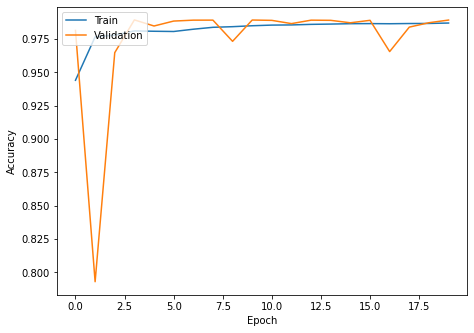

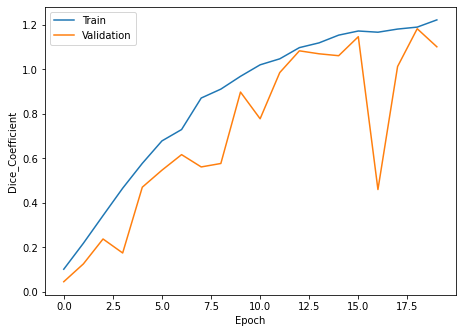

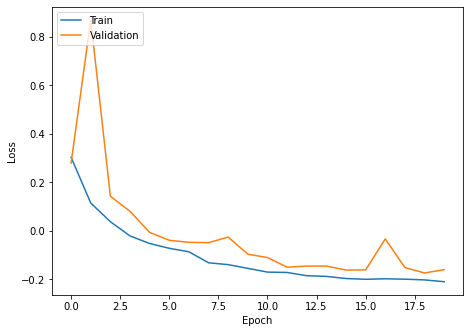

  2%|▏         | 20/1111 [12:31<11:23:33, 37.59s/it]


In [14]:
for i in tqdm(p):
    if (int(init_counter*inside_split_countert) == total_count_img) or \
        (int(top_limit_number*split_number) == int(init_counter*inside_split_countert)):
        print("Launch Final model.")
        launch_model(Input_Data, str(init_counter), model)
        del(Input_Data)
        gc.collect()
        break    
    if (init_counter == split_number):
        print("Launch model :"+str(init_counter*inside_split_countert))
        launch_model(Input_Data,str(init_counter*inside_split_countert),model)
        del(Input_Data)
        gc.collect()
        Input_Data= []
        inside_split_countert += 1
        init_counter=0
    create_path_post=Path+'/'+i+'/*'
    
    for name in sorted(glob(create_path_post.replace('\n',''))):
        os.system('gunzip ' + name)
    brain_dir = os.path.normpath(Path+'/'+i+'/')

    flair = glob(os.path.join(brain_dir, '*_flair*.nii'))
    t1 = glob(os.path.join(brain_dir, '*_t1*.nii'))
    t1ce = glob(os.path.join(brain_dir, '*_t1ce*.nii'))
    t2 = glob(os.path.join(brain_dir, '*_t2*.nii'))
    gt = glob( os.path.join(brain_dir, '*_seg*.nii'))

    modalities_dir = [flair[0], t1[0], t1ce[0], t2[0], gt[0]]
    P_Data = Data_Preprocessing(modalities_dir)
    Input_Data.append(P_Data)
    shutil.rmtree(Path+'/'+i)
    init_counter = init_counter + 1
